In [2]:
import joblib
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

import tensorflow.keras as keras

class Sled2DGenerator(keras.utils.Sequence):
    def __init__(self, data_dir, start, end, batch_size, shuffle):
        self.data_dir = Path(data_dir)
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.list_IDs = np.arange(start, end)
        self.on_epoch_end()

        self.scaler = StandardScaler()
        for id in tqdm(self.list_IDs, desc='Creating scaler'):
            im = np.load(self.data_dir / f'{id}.npy')
            self.scaler.partial_fit(im)

    def __len__(self):
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        X = np.zeros((self.batch_size, 89, 161), dtype=np.float64)
        Y = np.zeros((self.batch_size, 89, 161), dtype=np.float64)

        for idx, id in enumerate(list_IDs_temp):
            X[idx] = self.scaler.transform(np.load(self.data_dir / f'{id}.npy'))
            Y[idx] = self.scaler.transform(np.load(self.data_dir / f'{id+1}.npy'))

        return X, Y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

2022-03-09 01:18:20.195608: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Creating scaler: 100%|██████████| 99/99 [00:00<00:00, 2023.99it/s]

6


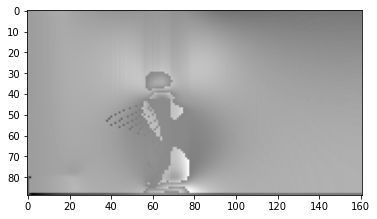

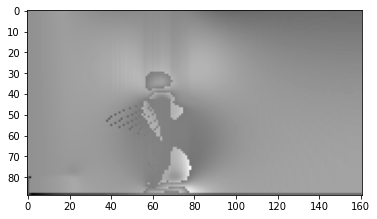

In [11]:
sled250 = Sled2DGenerator('/home/jperez/data/sled250_2D', 1, 100, batch_size=16, shuffle=False)
print(len(sled250))

batch_x, batch_y = sled250[6]
plt.figure()
plt.imshow(batch_x[0], cmap='gray')

plt.figure()
plt.imshow(batch_y[0], cmap='gray')

In [12]:
import keras.layers as layers
import keras.models as models

model = models.Sequential()
model.add(layers.Input(shape=(89, 161, 1)))
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.)